# LOAN PREDICTION

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('..\Downloads\hmeq.csv')

ANALYZING OUR DATA

In [3]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [4]:
df.info()
print('-'*40)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
BAD        5960 non-null int64
LOAN       5960 non-null int64
MORTDUE    5442 non-null float64
VALUE      5848 non-null float64
REASON     5708 non-null object
JOB        5681 non-null object
YOJ        5445 non-null float64
DEROG      5252 non-null float64
DELINQ     5380 non-null float64
CLAGE      5652 non-null float64
NINQ       5450 non-null float64
CLNO       5738 non-null float64
DEBTINC    4693 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB
----------------------------------------


,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [5]:
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

CONVERTING CATEGORICAL FEATURE TO  NUMERIC

In [6]:
df['JOB'].value_counts()

Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64

In [7]:
df['REASON'].value_counts()

DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64

In [8]:
df['REASON'] = df['REASON'].dropna().map({'DebtCon':0, 'HomeImp':1})
df['JOB'] = df['JOB'].dropna().map({'Other':0, 'ProfExe':1, 'Office':2, 'Mgr':3, 'Self':4, 'Sales':5})

In [9]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,1.0,0.0,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,1.0,0.0,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,1.0,0.0,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,1.0,2.0,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


ANALYZE BY VISUALIZING DATA

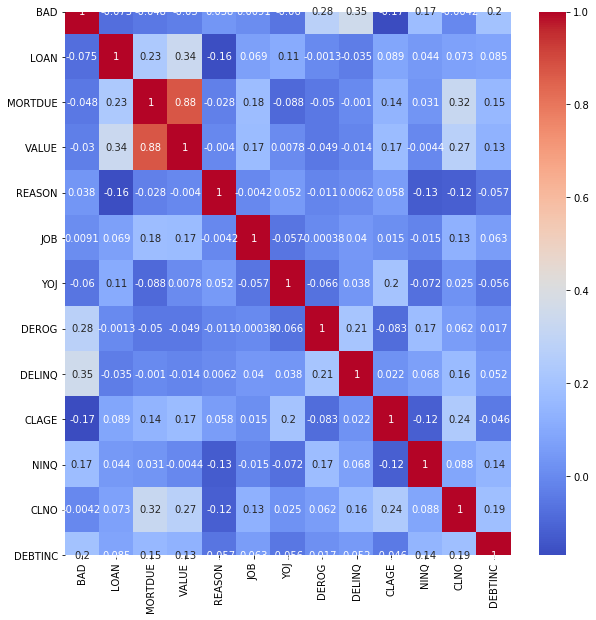

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr().dropna(), annot=True, cmap='coolwarm')

FILLING MISSING DATA

REASON-

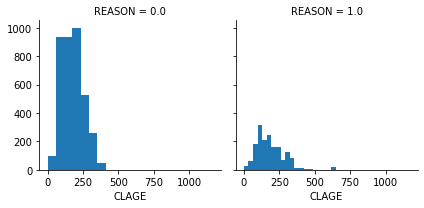

In [11]:
a = sns.FacetGrid(df, col='REASON')
a.map(plt.hist, 'CLAGE', bins=20)

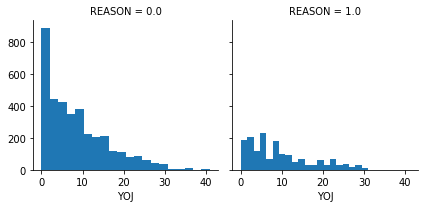

In [12]:
a = sns.FacetGrid(df, col='REASON')
a.map(plt.hist, 'YOJ', bins=20)

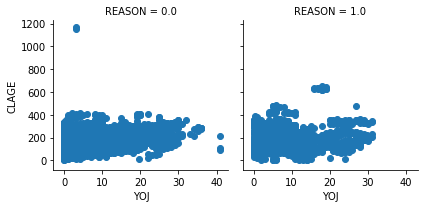

In [13]:
a = sns.FacetGrid(df, col='REASON')
a.map(plt.scatter, 'YOJ', 'CLAGE')

In [14]:
df.loc[(df['REASON'].isnull()) & (df['YOJ']>30.0), 'REASON'] = 0
df.loc[(df['REASON'].isnull()) & (df['YOJ']<15.0) & (df['CLAGE']<350.0), 'REASON'] = 0
df.loc[(df['REASON'].isnull()) & (df['CLAGE']>400.0), 'REASON'] = 1
df['REASON'].fillna('0', inplace=True)

JOB-

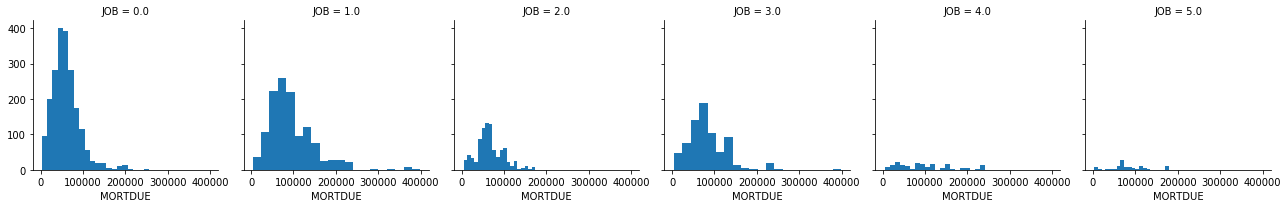

In [15]:
a = sns.FacetGrid(df, col='JOB')
a.map(plt.hist, 'MORTDUE', bins=20)

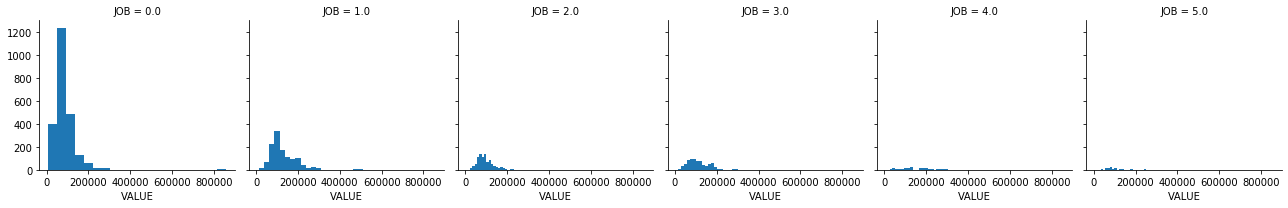

In [16]:
a = sns.FacetGrid(df, col='JOB')
a.map(plt.hist, 'VALUE', bins=20)

In [17]:
df.loc[(df['JOB'].isnull()) & (df['VALUE']<200000), 'JOB'] = 0
df.loc[(df['JOB'].isnull()) & (df['MORTDUE']>200000.0) & (df['MORTDUE']<300000.0), 'JOB'] = 2
df.loc[(df['JOB'].isnull()) & (df['MORTDUE']>200000.0) & (df['MORTDUE']<300000.0), 'JOB'] = 2
df['JOB'].fillna('0', inplace=True)

VALUE-

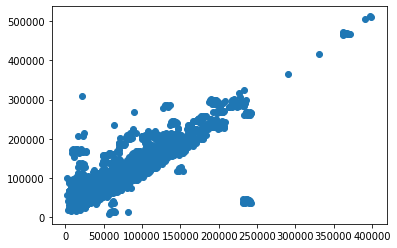

In [18]:
plt.scatter(x=df['MORTDUE'], y=df['VALUE'])

In [19]:
df.loc[(df['VALUE'].isnull()), 'VALUE'] = df.loc[(df['VALUE'].isnull()), 'MORTDUE']*2
df['VALUE'].fillna(df['VALUE'].mean(), inplace=True)

MORTDUE-

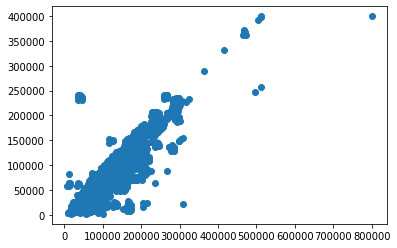

In [20]:
plt.scatter(y=df['MORTDUE'], x=df['VALUE'])

In [21]:
df.loc[(df['MORTDUE'].isnull()), 'MORTDUE'] = df.loc[(df['MORTDUE'].isnull()), 'VALUE']/2

CLAGE-

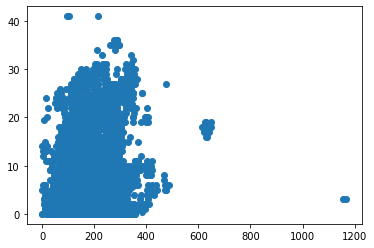

In [22]:
plt.scatter(y=df['YOJ'], x=df['CLAGE'])

In [23]:
for i in list(range(0,50,1)):
    df.loc[(df['CLAGE'].isnull()) & (df['YOJ']==i) , 'CLAGE'] = df.loc[(df['YOJ']==i), 'YOJ'].mean()
df['CLAGE'].fillna(df['CLAGE'].mean(), inplace=True)

YOJ-

In [24]:
for dataset in df:
    df.loc[(df['YOJ'].isnull()), 'YOJ'] = df.loc[(df['YOJ'].dropna()), 'YOJ'].mean()

C:\Users\Dheeraj\Anaconda3\lib\site-packages\pandas\core\indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


DELINQ AND DEROG-

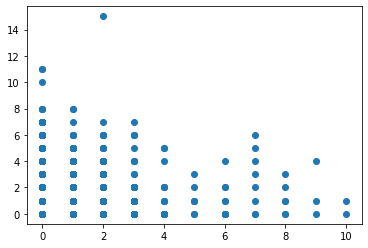

In [25]:
plt.scatter(y=df['DELINQ'], x=df['DEROG'])

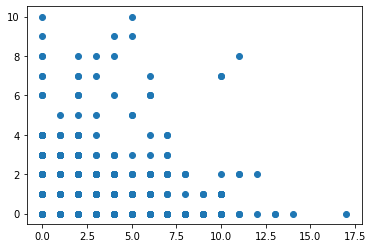

In [26]:
plt.scatter(x=df['NINQ'], y=df['DEROG'])

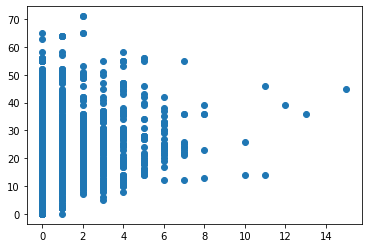

In [27]:
plt.scatter(y=df['CLNO'], x=df['DELINQ'])

In [42]:
for i in list(range(0,18,1)):
    df.loc[(df['DELINQ'].isnull()) & (df['DEROG']==i) , 'DELINQ'] = df.loc[(df['DEROG']==i), 'DELINQ'].mean()
    df.loc[(df['DEROG'].isnull()) & (df['DELINQ']==i) , 'DEROG'] = df.loc[(df['DELINQ']==i), 'DEROG'].mean()
    df.loc[(df['DEROG'].isnull()) & (df['NINQ']==i) , 'DEROG'] = df.loc[(df['NINQ']==i), 'DEROG'].mean()
    
for i in range(0,80,1):
    df.loc[(df['DELINQ'].isnull()) & (df['CLNO']==i),'DELINQ'] = df.loc[(df['DEROG']==i) & (df['CLNO']==i),'DELINQ'].mean()
    
df.loc[df['DEROG'].isnull(), 'DEROG'] = df.loc[df['DEROG'].dropna(), 'DEROG'].mean()
df.loc[df['DELINQ'].isnull(), 'DELINQ'] = df.loc[df['DELINQ'].dropna(), 'DELINQ'].mean()

NINQ-

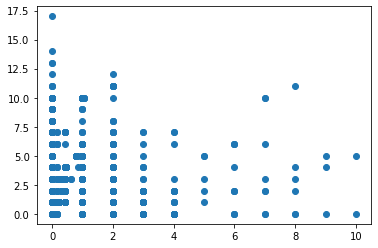

In [29]:
plt.scatter(y=df['NINQ'], x=df['DEROG'])

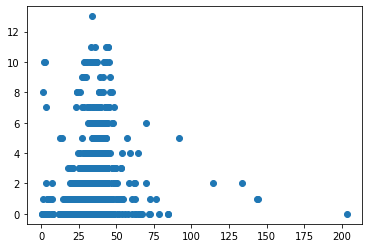

In [30]:
plt.scatter(y=df['NINQ'], x=df['DEBTINC'])

In [31]:
for i in range(0,10,1):
    df.loc[(df['NINQ'].isnull()) & (df['DEROG']==i) , 'NINQ'] = df.loc[(df['DEROG']==i), 'NINQ'].mean()
    
for i in range(0,75,1):
    df.loc[(df['NINQ'].isnull()) & (df['DEBTINC']==i) , 'NINQ'] = df.loc[(df['DEBTINC']==i), 'NINQ'].mean()
    
df['NINQ'].fillna(df['NINQ'].mean(), inplace=True)

DEBTINC-

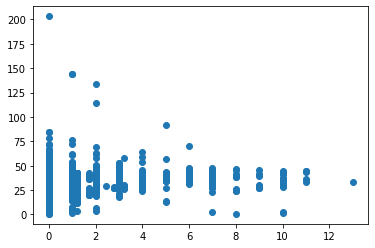

In [32]:
plt.scatter(y=df['DEBTINC'], x=df['NINQ'])

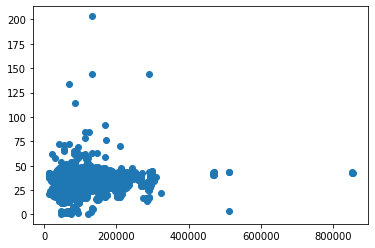

In [33]:
plt.scatter(y=df['DEBTINC'], x=df['VALUE'])

In [34]:
for i in range(0,12,1):
    df.loc[(df['DEBTINC'].isnull()) & (df['NINQ']==i) , 'DEBTINC'] = df.loc[(df['NINQ']==i), 'DEBTINC'].mean()
    
df.loc[(df['DEBTINC'].isnull()) & (df['VALUE']<200000.0), 'DEBTINC'] = df.loc[(df['VALUE']<200000.0), 'DEBTINC'].mean()
df['DEBTINC'].fillna(df['DEBTINC'].mean(), inplace=True)

CLNO-

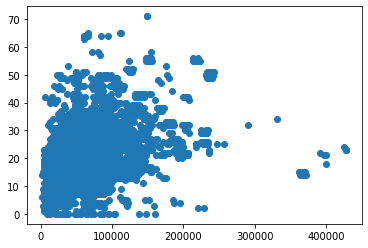

In [35]:
plt.scatter(y=df['CLNO'], x=df['MORTDUE'])

In [36]:
df.loc[(df['CLNO'].isnull()) & (df['MORTDUE']<100000.0), 'CLNO'] = df.loc[(df['MORTDUE']<200000.0), 'CLNO'].mean()
df['CLNO'].fillna(df['CLNO'].mean(), inplace=True)

REVIEWING THE DATA-

In [44]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.000000,39025.000000,1,0,10.500000,0.000000,0.00000,94.366667,1.000000,9.000000,34.514546
1,1,1300,70053.000000,68400.000000,1,0,7.000000,0.000000,2.00000,121.833333,0.000000,14.000000,32.726318
2,1,1500,13500.000000,16700.000000,1,0,4.000000,0.000000,0.00000,149.466667,1.000000,10.000000,34.514546
3,1,1500,51213.769007,102427.538014,0,0,8.388972,0.008661,0.26888,174.836683,1.192982,21.042304,33.949097
4,0,1700,97800.000000,112000.000000,1,2,3.000000,0.000000,0.00000,93.333333,0.000000,14.000000,32.726318
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.000000,90185.000000,0,0,16.000000,0.000000,0.00000,221.808718,0.000000,16.000000,36.112347
5956,0,89000,54576.000000,92937.000000,0,0,16.000000,0.000000,0.00000,208.692070,0.000000,15.000000,35.859971
5957,0,89200,54045.000000,92924.000000,0,0,15.000000,0.000000,0.00000,212.279697,0.000000,15.000000,35.556590
5958,0,89800,50370.000000,91861.000000,0,0,14.000000,0.000000,0.00000,213.892709,0.000000,16.000000,34.340882


In [45]:
df.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
BAD        5960 non-null int64
LOAN       5960 non-null int64
MORTDUE    5960 non-null float64
VALUE      5960 non-null float64
REASON     5960 non-null object
JOB        5960 non-null object
YOJ        5960 non-null float64
DEROG      5960 non-null float64
DELINQ     5960 non-null float64
CLAGE      5960 non-null float64
NINQ       5960 non-null float64
CLNO       5960 non-null float64
DEBTINC    5960 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [47]:
df[['REASON','JOB']] = df[['REASON','JOB']].astype('int64')

In [48]:
df.info()
print('-'*40)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
BAD        5960 non-null int64
LOAN       5960 non-null int64
MORTDUE    5960 non-null float64
VALUE      5960 non-null float64
REASON     5960 non-null int64
JOB        5960 non-null int64
YOJ        5960 non-null float64
DEROG      5960 non-null float64
DELINQ     5960 non-null float64
CLAGE      5960 non-null float64
NINQ       5960 non-null float64
CLNO       5960 non-null float64
DEBTINC    5960 non-null float64
dtypes: float64(9), int64(4)
memory usage: 605.4 KB
----------------------------------------


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
mean,0.199497,18607.969799,70326.297170,102427.538014,0.298658,1.139262,8.876186,0.244192,0.440040,174.836683,1.192982,21.287136,33.978350
std,0.399656,11207.480417,45291.736536,58808.375516,0.457708,1.298560,7.240852,0.799321,1.073724,88.296060,1.656479,9.948390,7.687606
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,41495.250000,66223.750000,0.000000,0.000000,3.000000,0.000000,0.000000,112.500095,0.000000,15.000000,30.763159
50%,0.000000,16300.000000,62042.500000,89668.000000,0.000000,1.000000,8.000000,0.000000,0.000000,172.863318,1.000000,21.000000,34.514546
75%,0.000000,23300.000000,88245.750000,120707.500000,1.000000,2.000000,12.000000,0.000000,0.268880,227.143058,2.000000,26.000000,38.130370
max,1.000000,89900.000000,427954.500000,855909.000000,1.000000,5.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


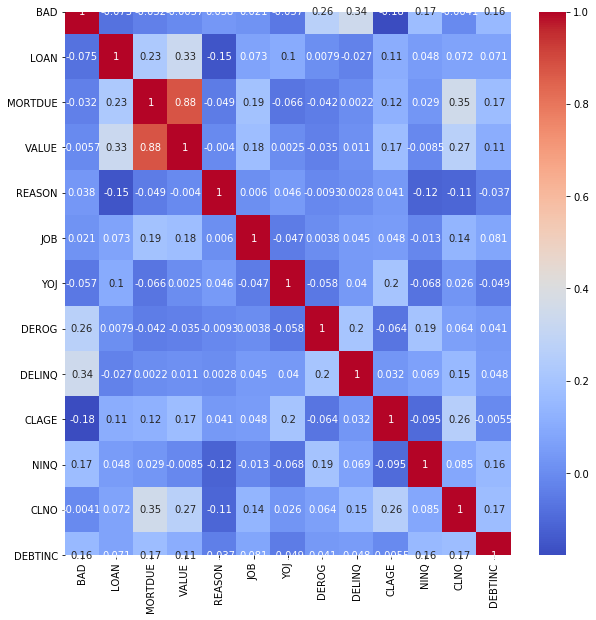

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr().dropna(), annot=True, cmap='coolwarm')

SPLITTING THE DATA

In [50]:
from sklearn.model_selection import train_test_split
X = df.drop('BAD', axis=1)
y = df['BAD']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 101)

MODEL

In [51]:
#RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier(n_jobs=-1)
param = {'n_estimators':range(30,100,10), 'max_depth':range(10,50,5), 'criterion':['gini','entropy']}
grid = GridSearchCV(model, param, cv=3)
grid.fit(X_train, y_train)
grid.best_params_
predictions = grid.predict(X_test)

In [52]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 50}

PREDICTIONS

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report
acs=accuracy_score(y_test,predictions)
rs=recall_score(y_test,predictions, average='macro') 
ps=precision_score(y_test,predictions, average='macro') 
print("accuracy score : ",acs)
print("precision score : ",rs)
print("recall score : ",ps)
#print("Accuracy : %s" % "{0:.3%}".format(acs))
print(classification_report(y_test, predictions))

accuracy score :  0.9183445190156599
precision score :  0.8276712537643427
recall score :  0.914419192162686
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1418
           1       0.91      0.67      0.77       370

    accuracy                           0.92      1788
   macro avg       0.91      0.83      0.86      1788
weighted avg       0.92      0.92      0.91      1788



SCALING FEATURES

In [54]:
df1 = df.drop('BAD', axis=1)

In [55]:
df1

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1100,25860.000000,39025.000000,1,0,10.500000,0.000000,0.00000,94.366667,1.000000,9.000000,34.514546
1,1300,70053.000000,68400.000000,1,0,7.000000,0.000000,2.00000,121.833333,0.000000,14.000000,32.726318
2,1500,13500.000000,16700.000000,1,0,4.000000,0.000000,0.00000,149.466667,1.000000,10.000000,34.514546
3,1500,51213.769007,102427.538014,0,0,8.388972,0.008661,0.26888,174.836683,1.192982,21.042304,33.949097
4,1700,97800.000000,112000.000000,1,2,3.000000,0.000000,0.00000,93.333333,0.000000,14.000000,32.726318
...,...,...,...,...,...,...,...,...,...,...,...,...
5955,88900,57264.000000,90185.000000,0,0,16.000000,0.000000,0.00000,221.808718,0.000000,16.000000,36.112347
5956,89000,54576.000000,92937.000000,0,0,16.000000,0.000000,0.00000,208.692070,0.000000,15.000000,35.859971
5957,89200,54045.000000,92924.000000,0,0,15.000000,0.000000,0.00000,212.279697,0.000000,15.000000,35.556590
5958,89800,50370.000000,91861.000000,0,0,14.000000,0.000000,0.00000,213.892709,0.000000,16.000000,34.340882


In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1)
scaled_features = scaler.transform(df1)

In [57]:
df_scaled = pd.DataFrame(scaled_features, columns=df1.columns)

In [58]:
df_scaled

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,-1.562299,-0.981857,-1.078211e+00,1.532421,-0.877401,0.224276,-0.305525,-0.409860,-9.114424e-01,-1.165110e-01,-1.235192,0.069754
1,-1.544453,-0.006035,-5.786658e-01,1.532421,-0.877401,-0.259133,-0.305525,1.452973,-6.003416e-01,-7.202519e-01,-0.732555,-0.162877
2,-1.526606,-1.254778,-1.457866e+00,1.532421,-0.877401,-0.673484,-0.305525,-0.409860,-2.873531e-01,-1.165110e-01,-1.134664,0.069754
3,-1.526606,-0.422022,-2.474671e-16,-0.652562,-0.877401,-0.067293,-0.294690,-0.159421,7.082197e-15,8.043445e-16,-0.024612,-0.003805
4,-1.508759,0.606645,1.627874e-01,1.532421,0.662896,-0.811601,-0.305525,-0.409860,-9.231464e-01,-7.202519e-01,-0.732555,-0.162877
...,...,...,...,...,...,...,...,...,...,...,...,...
5955,6.272411,-0.288428,-2.081942e-01,-0.652562,-0.877401,0.983919,-0.305525,-0.409860,5.320280e-01,-7.202519e-01,-0.531501,0.277613
5956,6.281335,-0.347781,-1.613943e-01,-0.652562,-0.877401,0.983919,-0.305525,-0.409860,3.834625e-01,-7.202519e-01,-0.632028,0.244781
5957,6.299181,-0.359506,-1.616153e-01,-0.652562,-0.877401,0.845802,-0.305525,-0.409860,4.240977e-01,-7.202519e-01,-0.632028,0.205314
5958,6.352722,-0.440654,-1.796925e-01,-0.652562,-0.877401,0.707685,-0.305525,-0.409860,4.423674e-01,-7.202519e-01,-0.531501,0.047162


In [59]:
#AGAIN SPLITTING THE DATA AFTER FEATURES WERE SCALED

from sklearn.model_selection import train_test_split
X = df_scaled
y = df['BAD']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 101)

In [60]:
#AGAIN APPLYING THE MODEL AFTER FEATURES WERE SCALED

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier(n_jobs=-1)
param = {'n_estimators':range(30,100,10), 'max_depth':range(10,50,5), 'criterion':['gini','entropy']}
grid = GridSearchCV(model, param, cv=3)
grid.fit(X_train, y_train)
grid.best_params_
predictions = grid.predict(X_test)

In [61]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 90}

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report
acs=accuracy_score(y_test,predictions)
rs=recall_score(y_test,predictions, average='macro') 
ps=precision_score(y_test,predictions, average='macro') 
print("accuracy score : ",acs)
print("precision score : ",rs)
print("recall score : ",ps)
#print("Accuracy : %s" % "{0:.3%}".format(acs))
print(classification_report(y_test, predictions))

accuracy score :  0.9239373601789709
precision score :  0.8381885411504594
recall score :  0.9226833103053981
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1418
           1       0.92      0.69      0.79       370

    accuracy                           0.92      1788
   macro avg       0.92      0.84      0.87      1788
weighted avg       0.92      0.92      0.92      1788



FEATURE ENGINEERING

In [63]:
df.corr(method='pearson')

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,1.000000,-0.075099,-0.032027,-0.005728,0.037517,0.021476,-0.057135,0.263624,0.341992,-0.178272,0.168451,-0.004123,0.157297
LOAN,-0.075099,1.000000,0.225429,0.328475,-0.151477,0.073062,0.099667,0.007879,-0.027179,0.107870,0.048017,0.072297,0.071395
MORTDUE,-0.032027,0.225429,1.000000,0.880051,-0.048564,0.190568,-0.065977,-0.042279,0.002194,0.122465,0.029189,0.353584,0.168274
VALUE,-0.005728,0.328475,0.880051,1.000000,-0.004000,0.175476,0.002498,-0.035389,0.011277,0.167731,-0.008492,0.265914,0.107499
REASON,0.037517,-0.151477,-0.048564,-0.004000,1.000000,0.005961,0.046024,-0.009289,0.002847,0.041410,-0.116745,-0.107116,-0.036965
JOB,0.021476,0.073062,0.190568,0.175476,0.005961,1.000000,-0.046884,0.003754,0.044507,0.047527,-0.012904,0.139182,0.081099
YOJ,-0.057135,0.099667,-0.065977,0.002498,0.046024,-0.046884,1.000000,-0.057777,0.040036,0.202505,-0.068264,0.026288,-0.048877
DEROG,0.263624,0.007879,-0.042279,-0.035389,-0.009289,0.003754,-0.057777,1.000000,0.203814,-0.064127,0.194791,0.063914,0.041050
DELINQ,0.341992,-0.027179,0.002194,0.011277,0.002847,0.044507,0.040036,0.203814,1.000000,0.031572,0.068719,0.154926,0.047625
CLAGE,-0.178272,0.107870,0.122465,0.167731,0.041410,0.047527,0.202505,-0.064127,0.031572,1.000000,-0.094895,0.258531,-0.005527


In [64]:
df2 = df.drop(['LOAN','MORTDUE','YOJ','VALUE','CLAGE','CLNO'], axis=1)

In [65]:
df2

,BAD,REASON,JOB,DEROG,DELINQ,NINQ,DEBTINC
0,1,1,0,0.000000,0.00000,1.000000,34.514546
1,1,1,0,0.000000,2.00000,0.000000,32.726318
2,1,1,0,0.000000,0.00000,1.000000,34.514546
3,1,0,0,0.008661,0.26888,1.192982,33.949097
4,0,1,2,0.000000,0.00000,0.000000,32.726318
...,...,...,...,...,...,...,...
5955,0,0,0,0.000000,0.00000,0.000000,36.112347
5956,0,0,0,0.000000,0.00000,0.000000,35.859971
5957,0,0,0,0.000000,0.00000,0.000000,35.556590
5958,0,0,0,0.000000,0.00000,0.000000,34.340882


In [66]:
df2.corr(method='pearson')

,BAD,REASON,JOB,DEROG,DELINQ,NINQ,DEBTINC
BAD,1.000000,0.037517,0.021476,0.263624,0.341992,0.168451,0.157297
REASON,0.037517,1.000000,0.005961,-0.009289,0.002847,-0.116745,-0.036965
JOB,0.021476,0.005961,1.000000,0.003754,0.044507,-0.012904,0.081099
DEROG,0.263624,-0.009289,0.003754,1.000000,0.203814,0.194791,0.041050
DELINQ,0.341992,0.002847,0.044507,0.203814,1.000000,0.068719,0.047625
NINQ,0.168451,-0.116745,-0.012904,0.194791,0.068719,1.000000,0.155115
DEBTINC,0.157297,-0.036965,0.081099,0.041050,0.047625,0.155115,1.000000


In [67]:
#AGAIN SPLITTING THE DATA AFTER FEATURE ENGINEERING

from sklearn.model_selection import train_test_split
X = df2.drop('BAD', axis=1)
y = df2['BAD']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 101)

In [68]:
#AGAIN APPLYING THE MODEL AFTER FEATURE ENGINEERING

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier(n_jobs=-1)
param = {'n_estimators':range(30,100,10), 'max_depth':range(10,50,5), 'criterion':['gini','entropy']}
grid = GridSearchCV(model, param, cv=3)
grid.fit(X_train, y_train)
grid.best_params_
predictions = grid.predict(X_test)

In [69]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 30}

In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report
acs=accuracy_score(y_test,predictions)
rs=recall_score(y_test,predictions, average='macro') 
ps=precision_score(y_test,predictions, average='macro') 
print("accuracy score : ",acs)
print("precision score : ",rs)
print("recall score : ",ps)
#print("Accuracy : %s" % "{0:.3%}".format(acs))
print(classification_report(y_test, predictions))

accuracy score :  0.8713646532438478
precision score :  0.7750810048412304
recall score :  0.8133989993746091
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1418
           1       0.72      0.61      0.66       370

    accuracy                           0.87      1788
   macro avg       0.81      0.78      0.79      1788
weighted avg       0.87      0.87      0.87      1788



RUNNING MODEL ON THE DATA MADE BY DROPPING ALL OF THE MISSING DATA IN THE ORIGINAL DATA

In [71]:
df3 = pd.read_csv('..\Downloads\hmeq.csv')

In [72]:
df3 = df3.dropna()

In [73]:
required_columns=['LOAN','MORTDUE','VALUE','YOJ','DEROG','DELINQ','CLAGE','NINQ','CLNO','DEBTINC']

In [74]:
required_columns

['LOAN',
 'MORTDUE',
 'VALUE',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'DEBTINC']

In [75]:
df3.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
19,0,2300,102370.0,120953.0,HomeImp,Office,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503
25,1,2400,34863.0,47471.0,HomeImp,Mgr,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601
26,0,2400,98449.0,117195.0,HomeImp,Office,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827


In [76]:
from sklearn.model_selection import train_test_split
X = df3[required_columns]
y = df3['BAD']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 101)

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier(n_jobs=-1)
param = {'n_estimators':range(30,100,10), 'max_depth':range(10,50,5), 'criterion':['gini','entropy']}
grid = GridSearchCV(model, param, cv=3)
grid.fit(X_train, y_train)
grid.best_params_
predictions = grid.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report
acs=accuracy_score(y_test,predictions)
rs=recall_score(y_test,predictions, average='macro') 
ps=precision_score(y_test,predictions, average='macro') 
print("accuracy score : ",acs)
print("precision score : ",rs)
print("recall score : ",ps)
#print("Accuracy : %s" % "{0:.3%}".format(acs))
print(classification_report(y_test, predictions))

accuracy score :  0.9405940594059405
precision score :  0.6968225747629467
recall score :  0.9451030927835051
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       914
           1       0.95      0.40      0.56        96

    accuracy                           0.94      1010
   macro avg       0.95      0.70      0.76      1010
weighted avg       0.94      0.94      0.93      1010

